In [20]:
from __future__ import print_function
from google.colab import drive
drive.mount('/content/drive')
# ссылка https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial/data
path = '/content/drive/My Drive/data/mobiles.csv'

import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

import tensorflow as tf
from tensorflow.python.data import Dataset

#tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
phone_dataframe = pd.read_csv('/content/drive/My Drive/data/mobiles.csv', sep=",")
phone_dataframe = phone_dataframe.reindex(np.random.permutation(phone_dataframe.index))
phone_dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty
958,958,itel IT5626,https://rukminim1.flixcart.com/image/312/312/k...,4.0,"1,310 Ratings & 138 Reviews","₹1,749\n₹2,09916% off",8 MB RAM | 8 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,7.11 cm (2.8 inch) QVGA Display,2500 mAh Lithium ion Battery,SC6531C Processor,100 Days Replacement with 1 Year of Phone Warr...
1129,1129,"IQOO Neo 6 5G (Dark Nova, 256 GB)",https://rukminim1.flixcart.com/image/312/312/x...,3.7,321 Ratings & 48 Reviews,"₹33,899\n₹39,99915% off",12 GB RAM | 256 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,1 Year,NaN
238,238,"realme C30s (Stripe Black, 64 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"4,371 Ratings & 259 Reviews","₹8,499\n₹11,99929% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium Ion Battery,Unisoc SC9863A/ Unisoc SC9863A1 Processor,1 Year Manufacturer Warranty for Phone and 6 M...
780,780,NaN,https://rukminim1.flixcart.com/image/300/300/k...,NaN,NaN,"₹1,74916% off",NaN,NaN,NaN,NaN,NaN,NaN
350,350,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"11,499 Ratings & 828 Reviews","₹14,999\n₹22,99934% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 8MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,1 Year Warranty Provided by the Manufacturer f...
...,...,...,...,...,...,...,...,...,...,...,...,...
677,677,"vivo Y01A (Sapphire Blue, 32 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.0,36 Ratings & 2 Reviews,"₹8,250\n₹12,99936% off",2 GB RAM | 32 GB ROM,8MP Rear Camera | 5MP Front Camera,16.54 cm (6.51 inch) HD+ Display,5000 mAh Battery,Mediatek Helio P35 Processor,1 Year on Handset and 6 Months on Accessories
436,436,"MOTOROLA e40 (Pink Clay, 64 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.2,"69,792 Ratings & 6,635 Reviews","₹8,999\n₹10,99918% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,UNISOC T700 Processor,1 Year on Handset and 6 Months on Accessories
999,999,"APPLE iPhone 13 (Green, 256 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.7,"1,89,398 Ratings & 10,410 Reviews","₹73,999\n₹79,9007% off",256 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A15 Bionic Chip Processor,Brand Warranty for 1 Year,NaN
990,990,GREENBERRI VIRAT,https://rukminim1.flixcart.com/image/312/312/l...,3.7,321 Ratings & 48 Reviews,₹849,64 MB RAM | 64 MB ROM | Expandable Upto 32 GB,2MP Rear Camera,4.57 cm (1.8 inch) Display,1000 mAh Battery,1 Year For Mobile,NaN


In [21]:
phone_dataframe.describe()

,Unnamed: 0,stars
count,1148.0,922.0
mean,573.5,4.2
std,331.5,0.2
min,0.0,3.3
25%,286.8,4.1
50%,573.5,4.2
75%,860.2,4.3
max,1147.0,4.7


In [22]:
phone_dataframe[['processor', 'names']]

,processor,names
958,SC6531C Processor,itel IT5626
1129,1 Year,"IQOO Neo 6 5G (Dark Nova, 256 GB)"
238,Unisoc SC9863A/ Unisoc SC9863A1 Processor,"realme C30s (Stripe Black, 64 GB)"
780,NaN,NaN
350,Qualcomm Snapdragon 750G Processor,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)"
...,...,...
677,Mediatek Helio P35 Processor,"vivo Y01A (Sapphire Blue, 32 GB)"
436,UNISOC T700 Processor,"MOTOROLA e40 (Pink Clay, 64 GB)"
999,Brand Warranty for 1 Year,"APPLE iPhone 13 (Green, 256 GB)"
990,1 Year For Mobile,GREENBERRI VIRAT


In [23]:
phone_dataframe['COPYstolbec']=phone_dataframe['price_details'].copy()
phone_dataframe

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,COPYstolbec
958,958,itel IT5626,https://rukminim1.flixcart.com/image/312/312/k...,4.0,"1,310 Ratings & 138 Reviews","₹1,749\n₹2,09916% off",8 MB RAM | 8 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,7.11 cm (2.8 inch) QVGA Display,2500 mAh Lithium ion Battery,SC6531C Processor,100 Days Replacement with 1 Year of Phone Warr...,"₹1,749\n₹2,09916% off"
1129,1129,"IQOO Neo 6 5G (Dark Nova, 256 GB)",https://rukminim1.flixcart.com/image/312/312/x...,3.7,321 Ratings & 48 Reviews,"₹33,899\n₹39,99915% off",12 GB RAM | 256 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,1 Year,NaN,"₹33,899\n₹39,99915% off"
238,238,"realme C30s (Stripe Black, 64 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"4,371 Ratings & 259 Reviews","₹8,499\n₹11,99929% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium Ion Battery,Unisoc SC9863A/ Unisoc SC9863A1 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹8,499\n₹11,99929% off"
780,780,NaN,https://rukminim1.flixcart.com/image/300/300/k...,NaN,NaN,"₹1,74916% off",NaN,NaN,NaN,NaN,NaN,NaN,"₹1,74916% off"
350,350,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"11,499 Ratings & 828 Reviews","₹14,999\n₹22,99934% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 8MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,1 Year Warranty Provided by the Manufacturer f...,"₹14,999\n₹22,99934% off"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,677,"vivo Y01A (Sapphire Blue, 32 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.0,36 Ratings & 2 Reviews,"₹8,250\n₹12,99936% off",2 GB RAM | 32 GB ROM,8MP Rear Camera | 5MP Front Camera,16.54 cm (6.51 inch) HD+ Display,5000 mAh Battery,Mediatek Helio P35 Processor,1 Year on Handset and 6 Months on Accessories,"₹8,250\n₹12,99936% off"
436,436,"MOTOROLA e40 (Pink Clay, 64 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.2,"69,792 Ratings & 6,635 Reviews","₹8,999\n₹10,99918% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,UNISOC T700 Processor,1 Year on Handset and 6 Months on Accessories,"₹8,999\n₹10,99918% off"
999,999,"APPLE iPhone 13 (Green, 256 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.7,"1,89,398 Ratings & 10,410 Reviews","₹73,999\n₹79,9007% off",256 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,A15 Bionic Chip Processor,Brand Warranty for 1 Year,NaN,"₹73,999\n₹79,9007% off"
990,990,GREENBERRI VIRAT,https://rukminim1.flixcart.com/image/312/312/l...,3.7,321 Ratings & 48 Reviews,₹849,64 MB RAM | 64 MB ROM | Expandable Upto 32 GB,2MP Rear Camera,4.57 cm (1.8 inch) Display,1000 mAh Battery,1 Year For Mobile,NaN,₹849


In [35]:
mobileDataCopy=phone_dataframe.copy()
mobileDataCopy.head(10).describe()

,Unnamed: 0,stars
count,10.0,8.0
mean,599.0,4.2
std,316.4,0.3
min,149.0,3.7
25%,362.5,4.1
50%,622.5,4.2
75%,770.2,4.3
max,1129.0,4.5


In [25]:
phone_dataframe.head(15)

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,COPYstolbec
958,958,itel IT5626,https://rukminim1.flixcart.com/image/312/312/k...,4.0,"1,310 Ratings & 138 Reviews","₹1,749\n₹2,09916% off",8 MB RAM | 8 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,7.11 cm (2.8 inch) QVGA Display,2500 mAh Lithium ion Battery,SC6531C Processor,100 Days Replacement with 1 Year of Phone Warr...,"₹1,749\n₹2,09916% off"
1129,1129,"IQOO Neo 6 5G (Dark Nova, 256 GB)",https://rukminim1.flixcart.com/image/312/312/x...,3.7,321 Ratings & 48 Reviews,"₹33,899\n₹39,99915% off",12 GB RAM | 256 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,1 Year,NaN,"₹33,899\n₹39,99915% off"
238,238,"realme C30s (Stripe Black, 64 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"4,371 Ratings & 259 Reviews","₹8,499\n₹11,99929% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium Ion Battery,Unisoc SC9863A/ Unisoc SC9863A1 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹8,499\n₹11,99929% off"
780,780,NaN,https://rukminim1.flixcart.com/image/300/300/k...,NaN,NaN,"₹1,74916% off",NaN,NaN,NaN,NaN,NaN,NaN,"₹1,74916% off"
350,350,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"11,499 Ratings & 828 Reviews","₹14,999\n₹22,99934% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 8MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,1 Year Warranty Provided by the Manufacturer f...,"₹14,999\n₹22,99934% off"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,LAVA A3 Power,https://rukminim1.flixcart.com/image/312/312/k...,4.2,"1,906 Ratings & 186 Reviews","₹1,329",0 GB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,4.5 cm (1.77 inch) Quarter QVGA Display,2575 mAh Li-ion Battery,1 Year Manufacturer Replacement Guarantee for ...,NaN,"₹1,329"
555,555,NaN,https://rukminim1.flixcart.com/image/300/300/k...,NaN,NaN,"₹1,74916% off",NaN,NaN,NaN,NaN,NaN,NaN,"₹1,74916% off"
683,683,"Google Pixel 7 Pro (Snow, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.4,"1,713 Ratings & 298 Reviews","₹80,999\n₹84,9994% off",12 GB RAM | 128 GB ROM,50MP + 48MP + 12MP | 10.8MP Front Camera,17.02 cm (6.7 inch) Quad HD+ Display,4926 mAh Battery,Google Tensor G2 Processor,1 Year Domestic Warranty,"₹80,999\n₹84,9994% off"
868,868,"Tecno Spark Go 2022 (Iris Purple, 32 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.3,809 Ratings & 57 Reviews,"₹6,699\n₹6,9213% off",2 GB RAM | 32 GB ROM,13MP Rear Camera,16.56 cm (6.52 inch) Display,5000 mAh Battery,1 Year,NaN,"₹6,699\n₹6,9213% off"


In [26]:
phone_dataframe.head(10).sort_values(by='stars')

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,COPYstolbec
1129,1129,"IQOO Neo 6 5G (Dark Nova, 256 GB)",https://rukminim1.flixcart.com/image/312/312/x...,3.7,321 Ratings & 48 Reviews,"₹33,899\n₹39,99915% off",12 GB RAM | 256 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,1 Year,NaN,"₹33,899\n₹39,99915% off"
958,958,itel IT5626,https://rukminim1.flixcart.com/image/312/312/k...,4.0,"1,310 Ratings & 138 Reviews","₹1,749\n₹2,09916% off",8 MB RAM | 8 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,7.11 cm (2.8 inch) QVGA Display,2500 mAh Lithium ion Battery,SC6531C Processor,100 Days Replacement with 1 Year of Phone Warr...,"₹1,749\n₹2,09916% off"
149,149,itel It2171,https://rukminim1.flixcart.com/image/312/312/k...,4.1,"3,973 Ratings & 352 Reviews","₹999\n₹1,14913% off",32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,4.57 cm (1.8 inch) Quarter QVGA Display,1000 mAh Battery,"100 Days Replacement Warranty, 1 year warranty...",NaN,"₹999\n₹1,14913% off"
658,658,"itel A49 (Sky Cyan, 32 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.2,571 Ratings & 31 Reviews,"₹5,699\n₹6,79916% off",2 GB RAM | 32 GB ROM | Expandable Upto 128 GB,5MP Rear Camera | 5MP Front Camera,16.76 cm (6.6 inch) HD+ Display,4000 mAh Li-Polymer Battery,Quad Core Processor,One Time Screen Replacement Within 100 Days of...,"₹5,699\n₹6,79916% off"
238,238,"realme C30s (Stripe Black, 64 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"4,371 Ratings & 259 Reviews","₹8,499\n₹11,99929% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium Ion Battery,Unisoc SC9863A/ Unisoc SC9863A1 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹8,499\n₹11,99929% off"
350,350,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"11,499 Ratings & 828 Reviews","₹14,999\n₹22,99934% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 8MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,1 Year Warranty Provided by the Manufacturer f...,"₹14,999\n₹22,99934% off"
400,400,"OPPO F21 Pro (Sunset Orange, 128 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.4,"2,473 Ratings & 179 Reviews","₹20,999\n₹27,99925% off",8 GB RAM | 128 GB ROM,64MP Rear Camera,16.33 cm (6.43 inch) Display,4500 mAh Battery,12 months,NaN,"₹20,999\n₹27,99925% off"
741,741,"realme 9 5G (Supersonic Blue, 64 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.5,"38,513 Ratings & 2,186 Reviews","₹15,999\n₹18,99915% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,Mediatek Dimensity 810 Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹15,999\n₹18,99915% off"
780,780,NaN,https://rukminim1.flixcart.com/image/300/300/k...,NaN,NaN,"₹1,74916% off",NaN,NaN,NaN,NaN,NaN,NaN,"₹1,74916% off"
587,587,NaN,https://rukminim1.flixcart.com/image/300/300/k...,NaN,NaN,"₹1,4493% off",NaN,NaN,NaN,NaN,NaN,NaN,"₹1,4493% off"


<Axes: xlabel='names'>

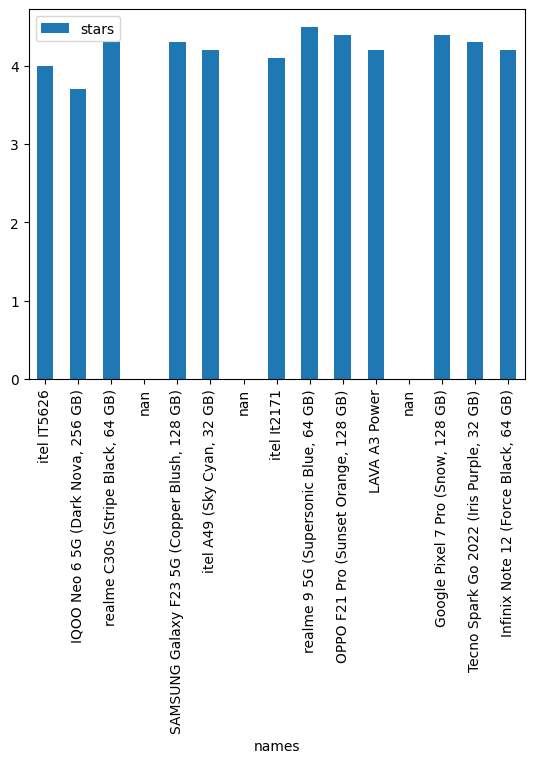

In [27]:
phone_dataframe.head(15).plot.bar(x='names', y='stars')

In [29]:
phone_dataframe.iloc[:2]

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,COPYstolbec
958,958,itel IT5626,https://rukminim1.flixcart.com/image/312/312/k...,4.0,"1,310 Ratings & 138 Reviews","₹1,749\n₹2,09916% off",8 MB RAM | 8 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,7.11 cm (2.8 inch) QVGA Display,2500 mAh Lithium ion Battery,SC6531C Processor,100 Days Replacement with 1 Year of Phone Warr...,"₹1,749\n₹2,09916% off"
1129,1129,"IQOO Neo 6 5G (Dark Nova, 256 GB)",https://rukminim1.flixcart.com/image/312/312/x...,3.7,321 Ratings & 48 Reviews,"₹33,899\n₹39,99915% off",12 GB RAM | 256 GB ROM,64MP Rear Camera,16.81 cm (6.62 inch) Display,4700 mAh Battery,1 Year,NaN,"₹33,899\n₹39,99915% off"


In [30]:
phone_dataframe.iloc[-2:]

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,COPYstolbec
990,990,GREENBERRI VIRAT,https://rukminim1.flixcart.com/image/312/312/l...,3.7,321 Ratings & 48 Reviews,₹849,64 MB RAM | 64 MB ROM | Expandable Upto 32 GB,2MP Rear Camera,4.57 cm (1.8 inch) Display,1000 mAh Battery,1 Year For Mobile,NaN,₹849
696,696,NaN,https://rukminim1.flixcart.com/image/300/300/k...,NaN,NaN,"₹2,3459% off",NaN,NaN,NaN,NaN,NaN,NaN,"₹2,3459% off"


In [31]:
phone_dataframe[phone_dataframe["stars"] > 4]

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,COPYstolbec
238,238,"realme C30s (Stripe Black, 64 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"4,371 Ratings & 259 Reviews","₹8,499\n₹11,99929% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium Ion Battery,Unisoc SC9863A/ Unisoc SC9863A1 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹8,499\n₹11,99929% off"
350,350,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"11,499 Ratings & 828 Reviews","₹14,999\n₹22,99934% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 8MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,1 Year Warranty Provided by the Manufacturer f...,"₹14,999\n₹22,99934% off"
658,658,"itel A49 (Sky Cyan, 32 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.2,571 Ratings & 31 Reviews,"₹5,699\n₹6,79916% off",2 GB RAM | 32 GB ROM | Expandable Upto 128 GB,5MP Rear Camera | 5MP Front Camera,16.76 cm (6.6 inch) HD+ Display,4000 mAh Li-Polymer Battery,Quad Core Processor,One Time Screen Replacement Within 100 Days of...,"₹5,699\n₹6,79916% off"
149,149,itel It2171,https://rukminim1.flixcart.com/image/312/312/k...,4.1,"3,973 Ratings & 352 Reviews","₹999\n₹1,14913% off",32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,4.57 cm (1.8 inch) Quarter QVGA Display,1000 mAh Battery,"100 Days Replacement Warranty, 1 year warranty...",NaN,"₹999\n₹1,14913% off"
741,741,"realme 9 5G (Supersonic Blue, 64 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.5,"38,513 Ratings & 2,186 Reviews","₹15,999\n₹18,99915% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,Mediatek Dimensity 810 Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹15,999\n₹18,99915% off"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,896,"Redmi 9A (Midnight Black, 32 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.3,"21,519 Ratings & 1,289 Reviews","₹7,789",2 GB RAM | 32 GB ROM,13MP Rear Camera,16.59 cm (6.53 inch) Full HD+ Display,5000 mAh Battery,1 Year Manufacturer Warranty,NaN,"₹7,789"
757,757,"MOTOROLA G40 Fusion (Frosted Champagne, 64 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.2,"32,929 Ratings & 3,704 Reviews","₹14,499\n₹16,99914% off",4 GB RAM | 64 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,17.22 cm (6.78 inch) Full HD+ Display,6000 mAh Battery,Qualcomm Snapdragon 732G Processor,120Hz Refresh Rate,"₹14,499\n₹16,99914% off"
816,816,"REDMI Note 9 (Pebble Grey, 128 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.3,"6,588 Ratings & 441 Reviews","₹14,999\n₹18,99921% off",6 GB RAM | 128 GB ROM | Expandable Upto 512 GB,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,5020 mAh Battery,MediaTek Helio G85 Processor,1 Year Manufacturer Warranty for Device and 6 ...,"₹14,999\n₹18,99921% off"
436,436,"MOTOROLA e40 (Pink Clay, 64 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.2,"69,792 Ratings & 6,635 Reviews","₹8,999\n₹10,99918% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,UNISOC T700 Processor,1 Year on Handset and 6 Months on Accessories,"₹8,999\n₹10,99918% off"


In [32]:
phone_dataframe[(phone_dataframe["stars"] > 4) & (phone_dataframe["processor"] == 'Octa-core Processor') ]

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,COPYstolbec
236,236,"realme C11 2021 (Cool Blue, 32 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.4,"2,34,278 Ratings & 10,138 Reviews","₹7,499\n₹7,9996% off",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,Octa-core Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,499\n₹7,9996% off"
337,337,"realme C11 2021 (Cool Grey, 64 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.3,"2,06,659 Ratings & 11,047 Reviews","₹8,999\n₹9,99910% off",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,Octa-core Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹8,999\n₹9,99910% off"
325,325,"realme C11 2021 (Cool Blue, 64 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.7,"14,444 Ratings & 620 Reviews","₹8,999\n₹9,99910% off",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,Octa-core Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹8,999\n₹9,99910% off"
237,237,"realme C11 2021 (Cool Grey, 32 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.4,"2,34,278 Ratings & 10,138 Reviews","₹7,499\n₹7,9996% off",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,Octa-core Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,499\n₹7,9996% off"


In [33]:
phone_dataframe[(phone_dataframe["stars"] > 4) ^ (phone_dataframe["processor"] == 'Octa-core Processor') ]

,Unnamed: 0,names,images_links,stars,rating&reviews,price_details,memory,camara_info,display,battery,processor,warranty,COPYstolbec
238,238,"realme C30s (Stripe Black, 64 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"4,371 Ratings & 259 Reviews","₹8,499\n₹11,99929% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,8MP Rear Camera | 5MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Lithium Ion Battery,Unisoc SC9863A/ Unisoc SC9863A1 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹8,499\n₹11,99929% off"
350,350,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",https://rukminim1.flixcart.com/image/312/312/x...,4.3,"11,499 Ratings & 828 Reviews","₹14,999\n₹22,99934% off",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 8MP + 2MP | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 750G Processor,1 Year Warranty Provided by the Manufacturer f...,"₹14,999\n₹22,99934% off"
658,658,"itel A49 (Sky Cyan, 32 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.2,571 Ratings & 31 Reviews,"₹5,699\n₹6,79916% off",2 GB RAM | 32 GB ROM | Expandable Upto 128 GB,5MP Rear Camera | 5MP Front Camera,16.76 cm (6.6 inch) HD+ Display,4000 mAh Li-Polymer Battery,Quad Core Processor,One Time Screen Replacement Within 100 Days of...,"₹5,699\n₹6,79916% off"
149,149,itel It2171,https://rukminim1.flixcart.com/image/312/312/k...,4.1,"3,973 Ratings & 352 Reviews","₹999\n₹1,14913% off",32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,0.3MP Rear Camera,4.57 cm (1.8 inch) Quarter QVGA Display,1000 mAh Battery,"100 Days Replacement Warranty, 1 year warranty...",NaN,"₹999\n₹1,14913% off"
741,741,"realme 9 5G (Supersonic Blue, 64 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.5,"38,513 Ratings & 2,186 Reviews","₹15,999\n₹18,99915% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,Mediatek Dimensity 810 Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹15,999\n₹18,99915% off"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,896,"Redmi 9A (Midnight Black, 32 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.3,"21,519 Ratings & 1,289 Reviews","₹7,789",2 GB RAM | 32 GB ROM,13MP Rear Camera,16.59 cm (6.53 inch) Full HD+ Display,5000 mAh Battery,1 Year Manufacturer Warranty,NaN,"₹7,789"
757,757,"MOTOROLA G40 Fusion (Frosted Champagne, 64 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.2,"32,929 Ratings & 3,704 Reviews","₹14,499\n₹16,99914% off",4 GB RAM | 64 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,17.22 cm (6.78 inch) Full HD+ Display,6000 mAh Battery,Qualcomm Snapdragon 732G Processor,120Hz Refresh Rate,"₹14,499\n₹16,99914% off"
816,816,"REDMI Note 9 (Pebble Grey, 128 GB)",https://rukminim1.flixcart.com/image/312/312/k...,4.3,"6,588 Ratings & 441 Reviews","₹14,999\n₹18,99921% off",6 GB RAM | 128 GB ROM | Expandable Upto 512 GB,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,5020 mAh Battery,MediaTek Helio G85 Processor,1 Year Manufacturer Warranty for Device and 6 ...,"₹14,999\n₹18,99921% off"
436,436,"MOTOROLA e40 (Pink Clay, 64 GB)",https://rukminim1.flixcart.com/image/312/312/l...,4.2,"69,792 Ratings & 6,635 Reviews","₹8,999\n₹10,99918% off",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,48MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,UNISOC T700 Processor,1 Year on Handset and 6 Months on Accessories,"₹8,999\n₹10,99918% off"


In [34]:
phone_dataframe[['COPYstolbec']].apply(lambda value: value*2)

,COPYstolbec
958,"₹1,749\n₹2,09916% off₹1,749\n₹2,09916% off"
1129,"₹33,899\n₹39,99915% off₹33,899\n₹39,99915% off"
238,"₹8,499\n₹11,99929% off₹8,499\n₹11,99929% off"
780,"₹1,74916% off₹1,74916% off"
350,"₹14,999\n₹22,99934% off₹14,999\n₹22,99934% off"
...,...
677,"₹8,250\n₹12,99936% off₹8,250\n₹12,99936% off"
436,"₹8,999\n₹10,99918% off₹8,999\n₹10,99918% off"
999,"₹73,999\n₹79,9007% off₹73,999\n₹79,9007% off"
990,₹849₹849
